# Super store data set

## We are predicting sales here


# logictic regression:
Logistic Regression is used to predict the categorical dependent variable using a given set of independent varaiables.

# Linear Regression
Linear Regression is used to predict the continuous dependent variable using a given set of independent variables.



We will see the problem from the point of view of a Business Manager and try to find out weak areas to  make more Sales.

Some questions we will try to answer are:
What is the average sales per month for the month?
What is the top demanded product in United States?
What is the favourite shipping mode for customers?



In [6]:
import pandas as pd
import numpy as np


import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from prettytable import PrettyTable
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#F0D290','#DE834D','#A3423C','#781D42','#671E31']
colors3 = ['#f0d290', '#e9c083', '#e2af77', '#d99d6d','#d08c64','#c67b5d', '#bc6b56','#b05a51','#a34b4d','#963b49','#872c45','#781d42']

from xgboost import XGBRegressor

In [7]:
df = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\Superstore_data.csv", encoding='unicode_escape')

In [8]:
df.head(7)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656


In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

__converting date which isin string to pandas datetime object__

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])




1. __.dt: This is an accessor that allows you to perform date and time operations on a Series of datetime objects. This part of the code assumes that the Order Date column has already been converted to a datetime format.__

2. __.to_period('M'): This is a datetime method that converts the datetime objects into Period objects, with a frequency of 'M' for month. This effectively truncates the dates to represent only the month and year (e.g., '2024-05').__

In [15]:
# making year-month for order and ship

df.insert(loc=3, column='order_month_year', value=df['Order Date'].dt.to_period('M'))
df.insert(loc=8, column='ship_month_year', value=df['Ship Date'].dt.to_period('M'))

In [16]:
# make columns with justday, month and year values for order

df.insert(loc=4, column='order_day', value=df['Order Date'].dt.day)
df.insert(loc=5, column='order_month', value=df['Order Date'].dt.month)
df.insert(loc=6, column='order_year', value=df['Order Date'].dt.year)

In [18]:
# make columns with just day, month, year for ship

df.insert(loc=9, column='ship_day', value=df['Ship Date'].dt.day)
df.insert(loc=10, column='ship_month', value=df['Ship Date'].dt.month)
df.insert(loc=10, column='ship_year', value=df['Ship Date'].dt.year)

In [27]:
df.head(7)

,Row ID,Order ID,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06,12,6,2016,2016-06-16,Second Class,16,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06,9,6,2014,2014-06-14,Standard Class,14,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06,9,6,2014,2014-06-14,Standard Class,14,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656


In [29]:
print('The shape of the dataset is', df.shape)

The shape of the dataset is (9994, 29)


__splitting the data into train and test__
70-30 split respectively

In [34]:
9994*0.7, 9994*0.3

(6995.799999999999, 2998.2)

In [36]:
raw_train = df.iloc[:6993]
raw_test = df.iloc[6994:].drop(columns='Sales')
#removed Sales as it is our target variable

In [39]:
train_original = raw_train.copy()
test_original = raw_test.copy()

__Exploratory Data Analysis(EDA)__

__we will remove unnecessary columns for our eda__

so we will drop Row ID, Order Id, Customer Id, Customer Name, Product ID, Product Name

In [45]:
raw_train.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'], axis=1, inplace=True)
raw_test.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name'], axis=1, inplace=True)


In [47]:
raw_train.columns

Index(['Order Date', 'order_month_year', 'order_day', 'order_month',
       'order_year', 'Ship Date', 'Ship Mode', 'ship_day', 'ship_year',
       'ship_month', 'ship_month_year', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [49]:
raw_test.columns

Index(['Order Date', 'order_month_year', 'order_day', 'order_month',
       'order_year', 'Ship Date', 'Ship Mode', 'ship_day', 'ship_year',
       'ship_month', 'ship_month_year', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

__drop the duplicate enteries__

In [53]:
raw_train.duplicated().sum()

1

In [55]:
raw_train.drop_duplicates(inplace=True)


In [57]:
raw_train.duplicated().sum()

0

In [59]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6992 entries, 0 to 6992
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        6992 non-null   datetime64[ns]
 1   order_month_year  6992 non-null   period[M]     
 2   order_day         6992 non-null   int32         
 3   order_month       6992 non-null   int32         
 4   order_year        6992 non-null   int32         
 5   Ship Date         6992 non-null   datetime64[ns]
 6   Ship Mode         6992 non-null   object        
 7   ship_day          6992 non-null   int32         
 8   ship_year         6992 non-null   int32         
 9   ship_month        6992 non-null   int32         
 10  ship_month_year   6992 non-null   period[M]     
 11  Segment           6992 non-null   object        
 12  Country           6992 non-null   object        
 13  City              6992 non-null   object        
 14  State             6992 non-nu

__we have three types of data here__

1. Categorical -> Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category
2. Numerical -> Postal Code, Sales, Quantity, Discount, Profit
3. Pandas Date time -> Order Date, order_month_year, Ship Date, ship_month_year

# Univariate analysis

__Categorical Features__

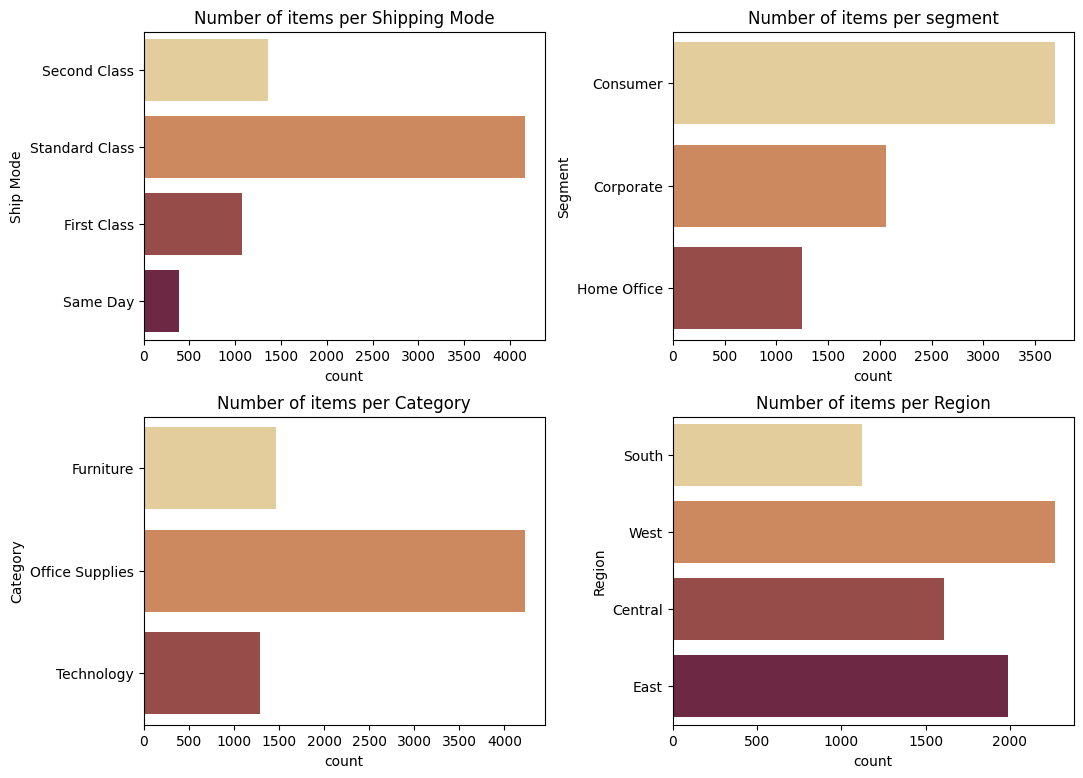

In [65]:
plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(wspace=0.32, hspace=0.25)

plt.subplot(221)
sns.countplot(data=raw_train, y='Ship Mode', orient='h', palette=colors);
plt.title("Number of items per Shipping Mode");

plt.subplot(222)
sns.countplot(data=raw_train, y='Segment', orient='h', palette=colors);
plt.title("Number of items per segment");

plt.subplot(224)
sns.countplot(data=raw_train, y='Region', orient='h', palette=colors);
plt.title("Number of items per Region");

plt.subplot(223)
sns.countplot(data=raw_train, y='Category', orient='h', palette=colors)
plt.title('Number of items per Category');

plt.show()

In [66]:
# Standard Class
4000/6993 * 100

57.200057200057195

In [67]:
# Consumer Segment
3500/6993 *100

50.050050050050054

In [69]:
# Office Supply Category
4000/6993 * 100

57.200057200057195

__observations__
* Around 60% of the shippment happens in "Standard Class"mode.
* Consumer Segment makes up for around 50% of dataset.
* 60% of the items are "Office Supplies"
* Majority of the items in the dataset are from the 'West' region

__Numerical Features__

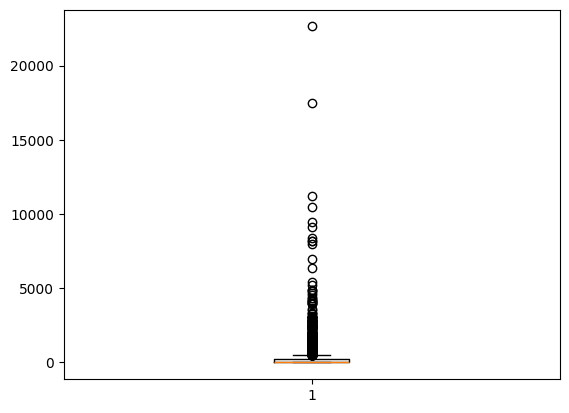

In [76]:
plt.boxplot(data=raw_train, x='Sales')
plt.show()

In [78]:
Q1 = raw_train['Sales'].quantile(0.25)
Q3 = raw_train['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound, upper_bound)

-274.59000000000003 503.89


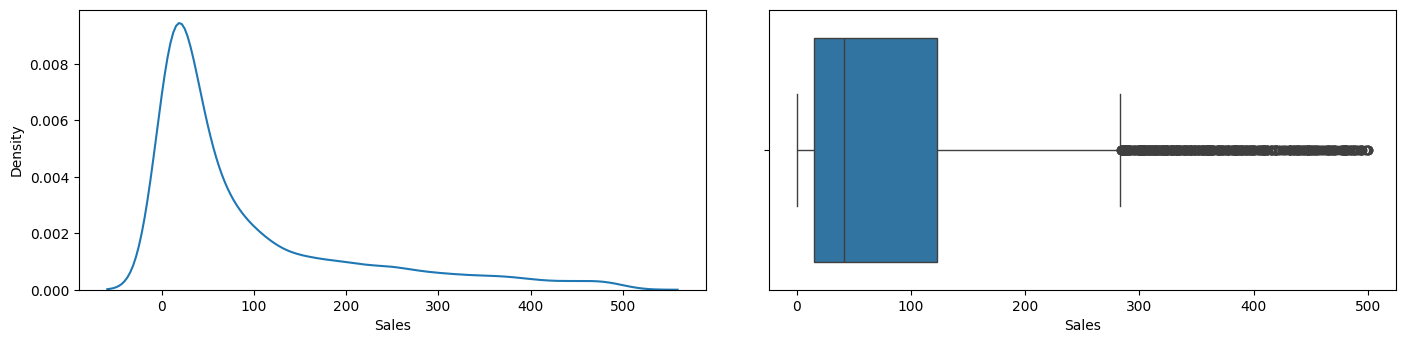

In [80]:
plt.figure(2, figsize=(17, 8))
plt.subplots_adjust(wspace=0.1);

#raw_train['Sales'] <= 500 --> fixing the outliers

plt.subplot(221)
sns.kdeplot(data=raw_train[raw_train['Sales'] <= 500], x='Sales');

plt.subplot(222)
sns.boxplot(data=raw_train[raw_train['Sales'] <=500], x='Sales', orient='h');

plt.show()



Most of the data is distributed towards left which means it is not normally distributed
The boxplot shows the presence of outliers



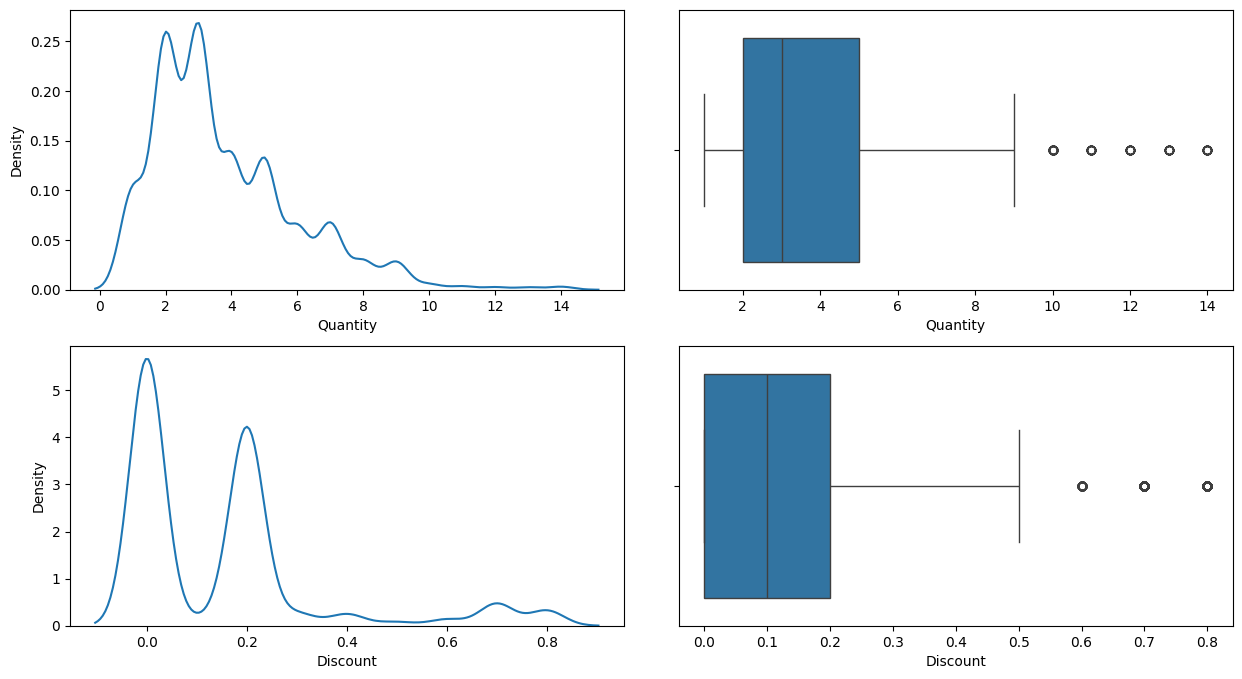

In [83]:
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.1)

plt.subplot(221)
sns.kdeplot(data=raw_train, x='Quantity');

plt.subplot(222)
sns.boxplot(data=raw_train, x='Quantity', orient='h');

plt.subplot(223)
sns.kdeplot(data=raw_train, x='Discount');

plt.subplot(224)
sns.boxplot(data=raw_train, x='Discount', orient='h');

plt.show()

* __from kdeplot__
  * Most of the population from the dataset ('6993', raw_train) have bought 3 items.
  * 20% discount is most common.

* __from boxplot__
  * Boxplot on 'Quantity' shows that item purchase of more than 9 is very rare, and there are 5 such outliers.
  * Discount rates of 60, 70, 80 are rare.

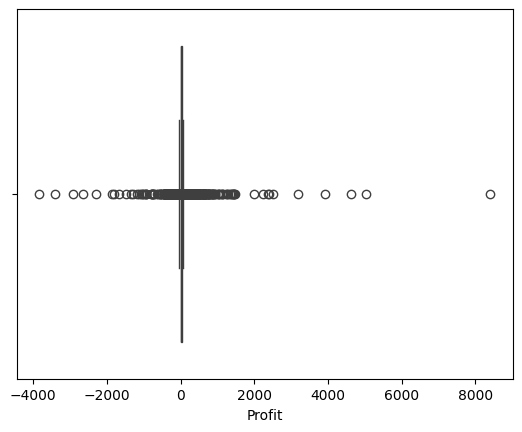

Profit
False    5747
True     1245
Name: count, dtype: int64
3       -383.0310
14      -123.8580
15        -3.8160
23        -1.0196
27     -1665.0522
          ...    
6948     -23.7822
6950     -29.3238
6970      -2.5248
6973     -13.9380
6989      -3.7584
Name: Profit, Length: 1245, dtype: float64


In [85]:
sns.boxplot(data=raw_train, x='Profit')
plt.show()
print((raw_train['Profit']<0).value_counts())
print((raw_train['Profit'][raw_train['Profit']<0]))

In [87]:
Q1 = raw_train['Profit'].quantile(0.25)
Q3 = raw_train['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound, upper_bound)

-40.021125 71.932675


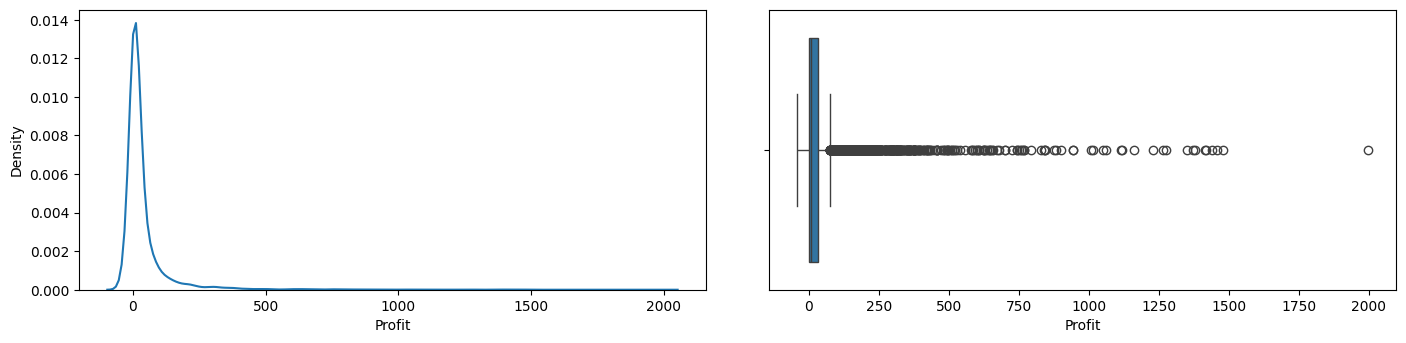

In [89]:
plt.figure(4, figsize=(17, 8))
plt.subplots_adjust(wspace=0.1)


plt.subplot(221)
sns.kdeplot(data=raw_train[(raw_train['Profit'] <= 2000) & (raw_train['Profit'] >= -40 )], x='Profit');

plt.subplot(222)
sns.boxplot(data=raw_train[(raw_train['Profit'] <= 2000) & (raw_train['Profit'] >= -40)], x='Profit', orient='h');

plt.show()

__Bivariate analysis__

Q1) __What is the average sales/month for the store?__

In [96]:
monthly_sales = pd.DataFrame(raw_train.groupby('order_month_year')[['Quantity','Sales']].sum()).reset_index()

monthly_sales.head()

,order_month_year,Quantity,Sales
0,2014-01,219,9413.681
1,2014-02,91,2979.008
2,2014-03,331,37498.440
3,2014-04,384,20538.709
4,2014-05,312,14395.666


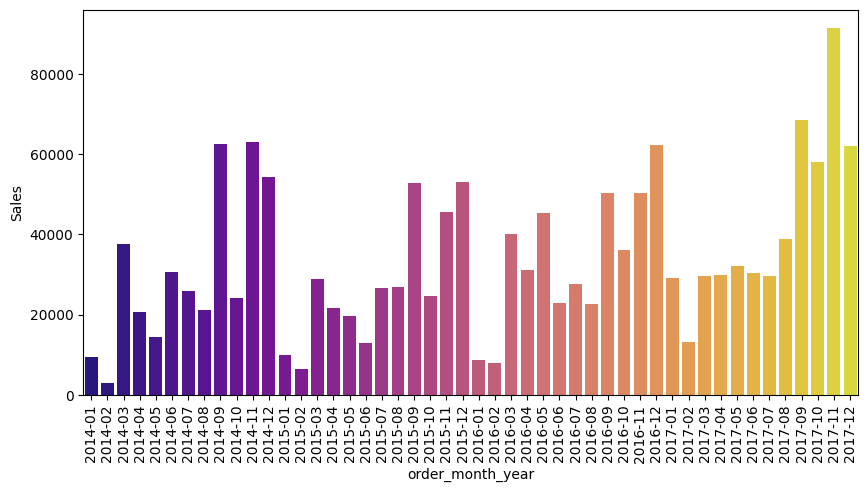

In [98]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'order_month_year', y='Sales', data= monthly_sales, palette='plasma')

plt.xticks(rotation=90)

plt.show()

Q2) __What is the top demanded product in United States?__


In [100]:
most_demand_qty = pd.DataFrame(raw_train.groupby('Category')['Quantity'].sum()).reset_index()

most_demand_qty.sort_values(by='Quantity', ascending=False, inplace=True)

most_demand_qty

,Category,Quantity
1,Office Supplies,16046
0,Furniture,5568
2,Technology,4863


In [101]:
top_category = pd.DataFrame(most_demand_qty.groupby('Category')['Quantity'].sum()).reset_index()

top_category.sort_values(by='Quantity', ascending= False, inplace=True)

top_category

,Category,Quantity
1,Office Supplies,16046
0,Furniture,5568
2,Technology,4863


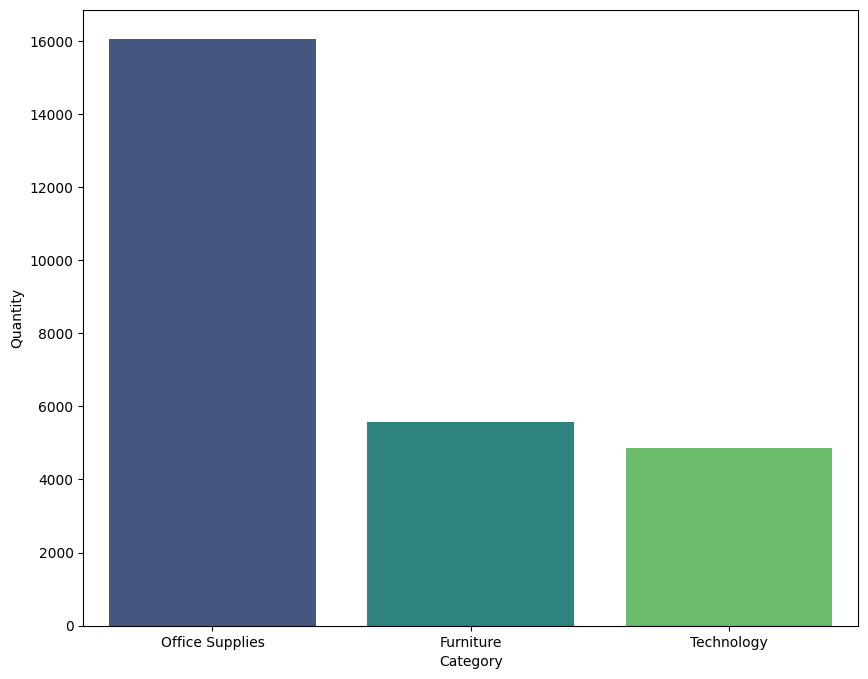

In [103]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_category, x='Category', y='Quantity', palette='viridis')
plt.show()

__Clearly most demanded product are office supply__

Q3) __What is the favourite shipping mode for customers?__

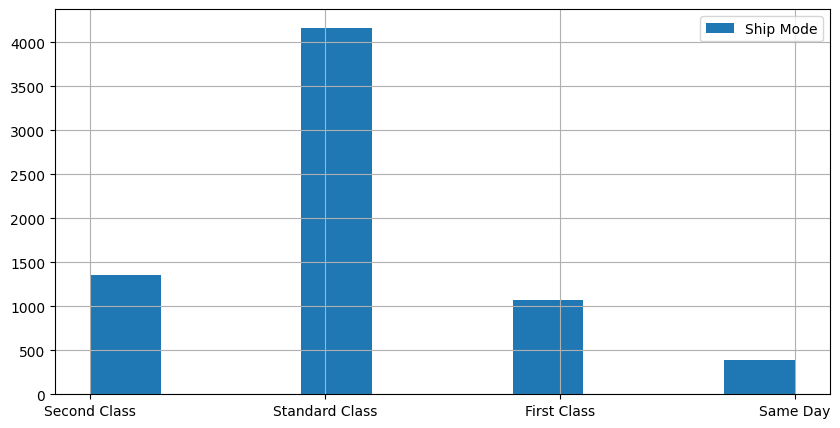

In [110]:
raw_train['Ship Mode'].hist(figsize=(10, 5), legend=True);
plt.show()

__so the favourite shipping mode without a doubt is Standard Class__

## Time Series Analysis Questions

__* How have Sales changed through the years?__

__* What are the number of Sales/Category?__

__* Number of Sales/Mode of shipment.__

__* Number of Sales/Region.__

__* What are the Sales for each Region?__

__* Which Region is Profitable to the superstore?__

__* How do the Profit in different Segments compare in different Regions?__

__* Mean Profit for different Segments in different Regions.__

Time Series Analysis (TSA) is a statistical and machine learning method for analyzing data points collected over time to understand underlying patterns and make future predictions. 📈

It's fundamentally different from other statistical analyses because the order of the data points matters. Time series data is serially dependent, meaning each observation can be related to the ones that came before it.

# Key Components of a Time Series
A time series can be broken down into three main components:

Trend: The long-term direction of the data. The trend can be upward (increasing), downward (decreasing), or flat (constant). For example, a country's GDP generally shows an upward trend over many years.

Seasonality: A predictable and repeating pattern in the data that occurs over a fixed period, like a day, week, month, or year. A classic example is retail sales, which typically spike during the holiday season every year. 🎄

Cyclicality: Fluctuations that are not of a fixed period. These are typically associated with economic cycles or business cycles and can last for several years.

# Common Methods and Models
Analysts use various models to forecast future values and understand the data's behavior:

__ARIMA (AutoRegressive Integrated Moving Average):__ A widely used model that combines three components:

__AR (AutoRegressive):__ Uses past values to predict future ones.

__I (Integrated):__ Involves differencing the data to make it stationary (removing trends and seasonality).

__MA (Moving Average):__ Uses past forecast errors to improve future predictions.

__Exponential Smoothing:__ A family of models that weigh past observations, with more recent data points given more weight. It's often effective for data with trends and seasonality.

__Prophet:__ An open-source forecasting library from Facebook designed for business forecasts, which is easy to use and handles missing data and outliers well.

# Applications
Time Series Analysis is used across many fields, including:

Economics: Forecasting stock prices, inflation rates, and GDP.

Business: Predicting product sales, website traffic, and customer demand.

Climate Science: Analyzing temperature trends and weather patterns. ☀️

Healthcare: Monitoring patient vitals and forecasting disease outbreaks.



## Before moving forward we must understand time series concept why ml algo are not useful 
## for advance concepts [Introduction to Time Series Analysis and key concepts](https://medium.com/analytics-vidhya/introduction-to-time-series-analysis-and-key-concepts-dbf6c394984f)

In [119]:
regions = raw_train['Region'].unique()
shipModes = raw_train['Ship Mode'].unique()
categories = raw_train['Category'].unique()
regions,shipModes, categories

(array(['South', 'West', 'Central', 'East'], dtype=object),
 array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['Furniture', 'Office Supplies', 'Technology'], dtype=object))

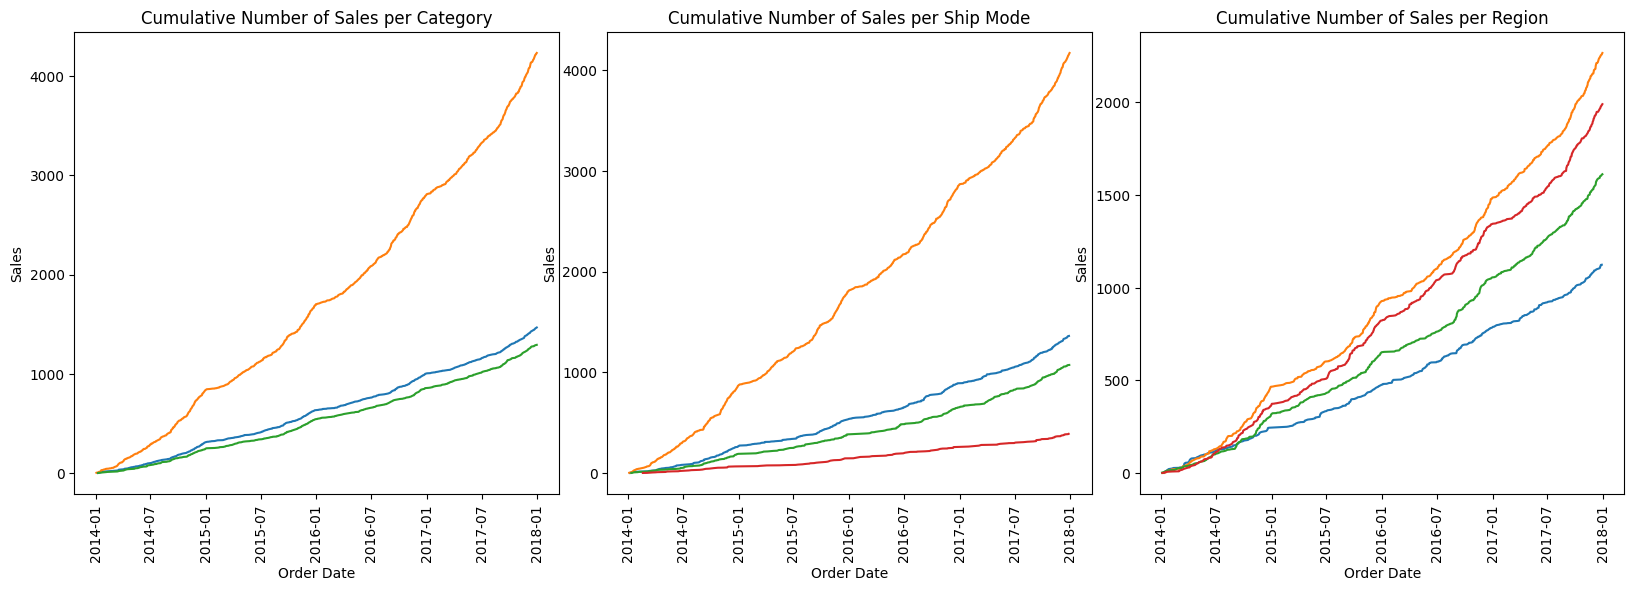

In [121]:
plt.figure(5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1);


#graphing 'Sales' vs. 'Category'
dfbyCatOrderDate = raw_train.groupby(['Category','Order Date'])
plt.subplot(131).title.set_text('Cumulative Number of Sales per Category')
plt.xticks(rotation=90)
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))



# graphing 'Sales' vs 'Ship Mode'
dfbyShipOrderDate = raw_train.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Ship Mode')
plt.xticks(rotation=90)
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))


#graphing 'Sales' vs 'Region'
dfbyRegionOrderDate = raw_train.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per Region')
plt.xticks(rotation=90)
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))


plt.show()

We can see that the sales have increased over the years indicating that the superstore business is doing well and might also be profitable. Looking at the graph we can also infer that at the end of each year there is rise in the sales, attributing to the fact that it is holiday season around this time.

__Sales for each region__

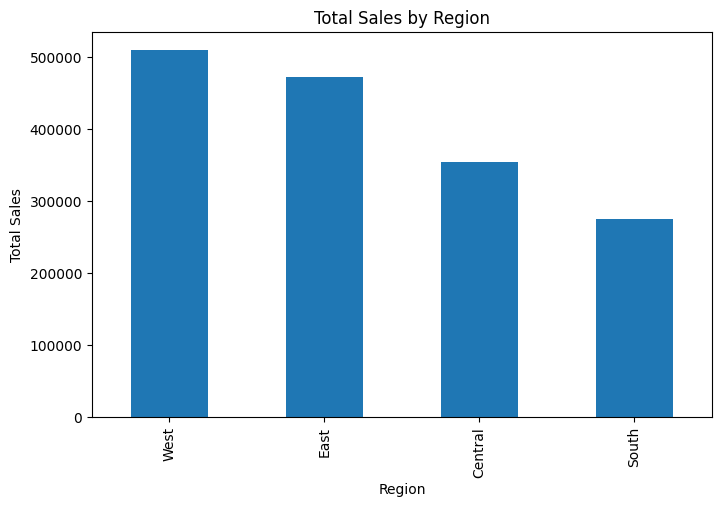

In [125]:
plt.figure(7, figsize=(8, 5))

dfByRegion = raw_train.groupby('Region')


dfByRegion['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Sales')
plt.title("Total Sales by Region");
plt.show()

__when you call df.groupby('Region'), pandas creates an internal object that keeps track of the indices of the rows belonging to each group. Think of it like this:__

__The 'West' group doesn't get its own new DataFrame; it's simply represented by a list of indices, like [2, 7, 10, ...] from the original DataFrame.__

__The 'South' group is another list of indices, like [0, 1, 3, 5, ...].__

__When you then call ['Sales'].sum(), pandas efficiently applies the sum() function to the Sales column, but it only calculates the sum for the rows identified by the indices for each group. It does this without ever creating a copy of the data.__

__This is why groupby is so fast and memory-efficient—it works on a reference basis, not by creating temporary copies.__

__Which region is profitable to the superstore?__

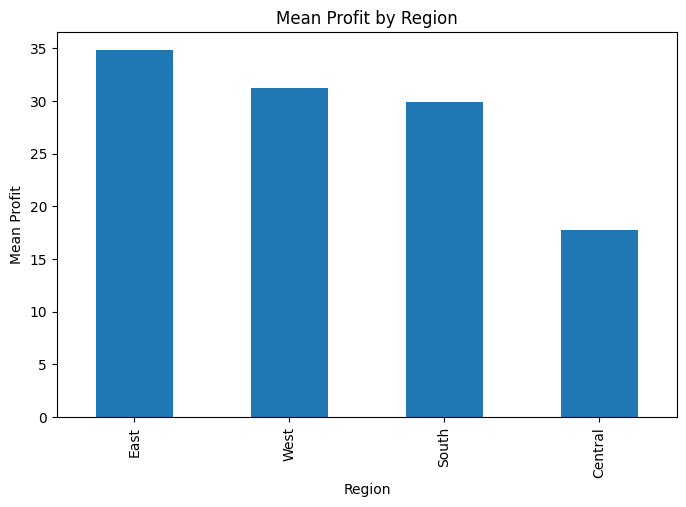

In [131]:
plt.figure(6, figsize=(8, 5))

dfByRegion['Profit'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Mean Profit')
plt.title("Mean Profit by Region")
plt.show()

We see that although the __Central__ region has __more sales__ than the __South__  region, the __South region__ is way more __profitable__.
We see similarly that __Sales__ of __West__ is __high__ than __East__ but __East__ is more __profitable__ __than West.__

__How do Profit in different Segments compare in different Regions?__

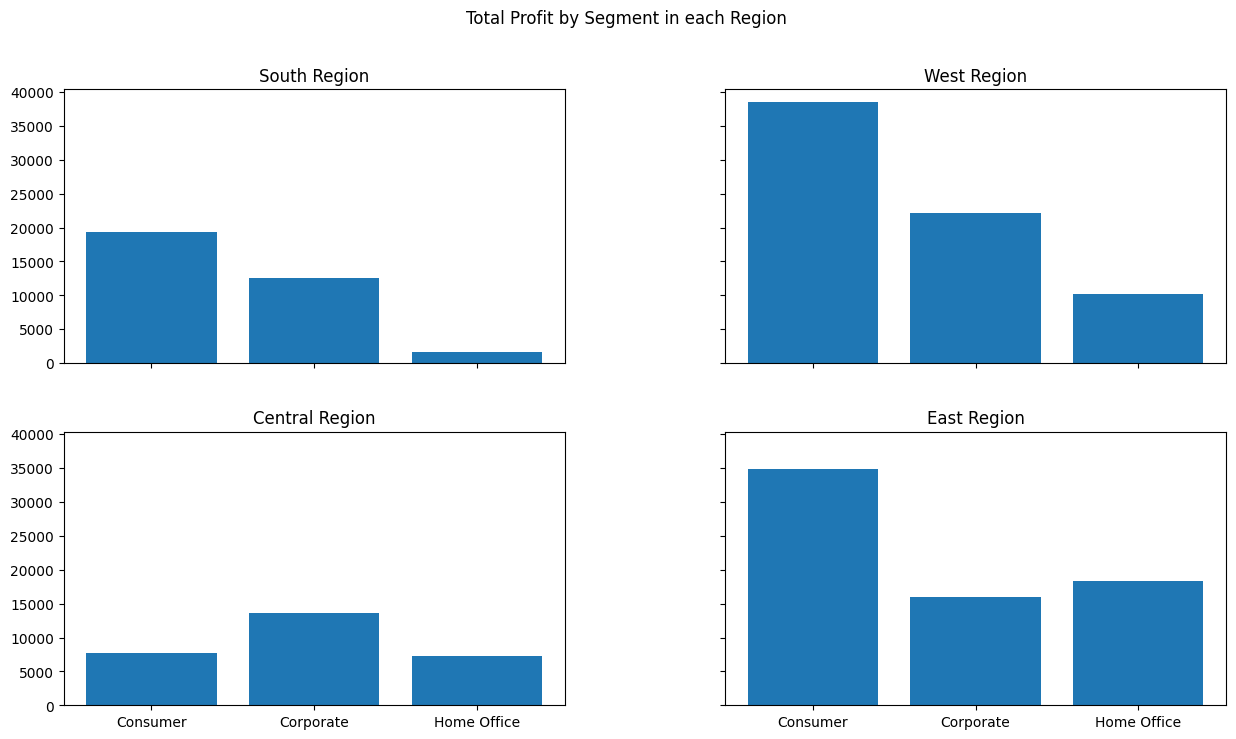

In [136]:
dfByRegionSegment = raw_train.groupby(['Region','Segment'])

fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(15,8))
axsIdx = [[0,0], [0,1], [1,0], [1,1]]
plt.subplots_adjust(wspace=0.32, hspace=0.25);

for idx, region in enumerate(regions):
    data = dfByRegionSegment['Profit'].sum()[region]
    axs[axsIdx[idx][0], axsIdx[idx][1]].bar(data.index, data.values)
    axs[axsIdx[idx][0], axsIdx[idx][1]].title.set_text(f"{region} Region")

plt.suptitle("Total Profit by Segment in each Region")
plt.show()

We can see that the Consumer Segment is responsible for the most Profit in all Regions besides the Central Region. We can also see that the West and South Regions are similar with each Segment's Profits share order. Another observation is that the Home Office segment is more important in the East Region.

__What is the Mean Profit for different Segments in different Regions?__

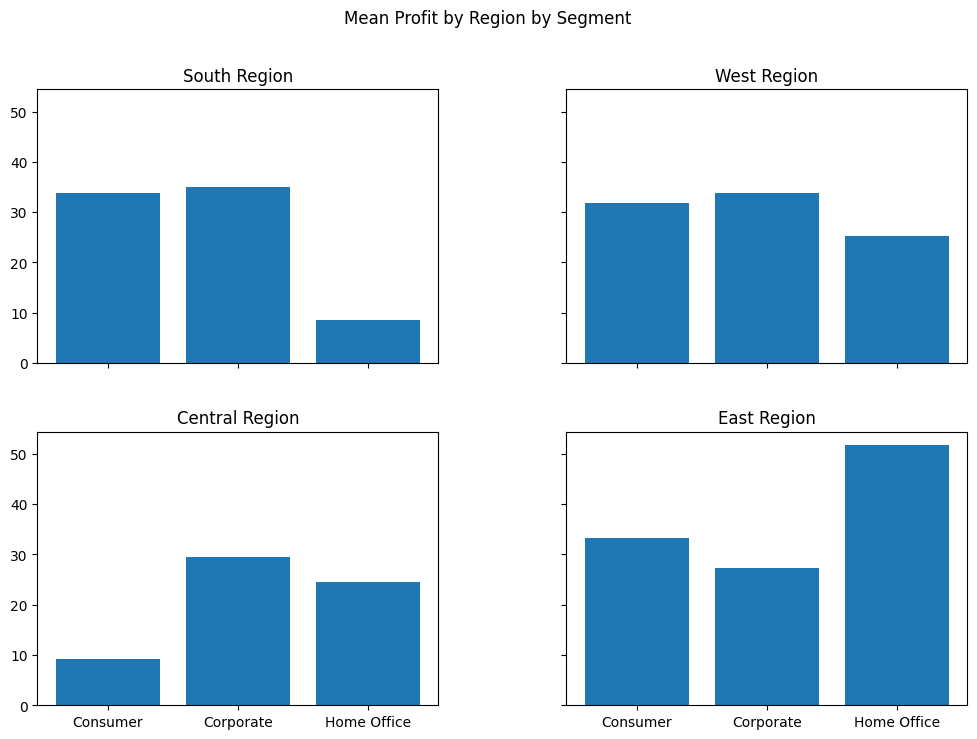

In [141]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12, 8))

axsId = [[0,0], [0,1], [1,0], [1,1]]
plt.subplots_adjust(wspace=0.32, hspace=0.25);

for idx, region in enumerate(regions):
    data = dfByRegionSegment['Profit'].mean()[region]
    axs[axsIdx[idx][0],axsIdx[idx][1]].bar(data.index, data.values)
    axs[axsIdx[idx][0], axsIdx[idx][1]].title.set_text(f"{region} Region")

plt.suptitle("Mean Profit by Region by Segment")
plt.show()

1. So Consumer category showed max profit in south, west, east region 
but in the mean profit chart we see that it is not the one with highest Mean Profit

2. In East Region HomeOffice Segment has clear adventage over other categories

3. In Central Region Consumer Segment has clear disadvantage over other categories

4. In West Region we can that almost all Segments have equal share of Mean Profit

5. In South Region as we see that Consumer Segment has highest Profit but in Mean Profit chart Consumer Segment and
    Corporate Segment have equal share of the Mean Profit

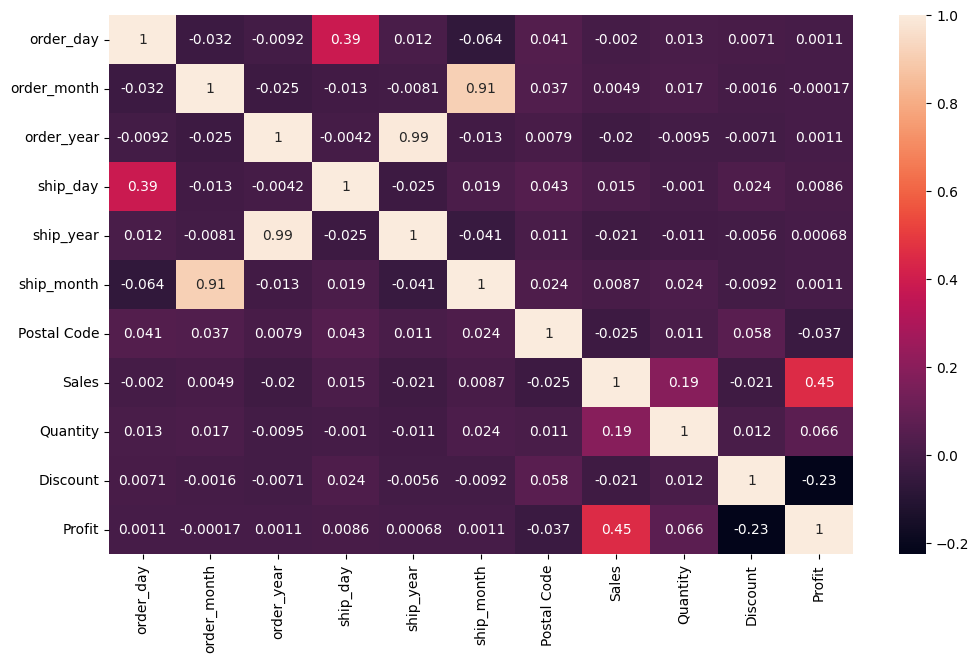

In [144]:
matrix = raw_train.select_dtypes(include=['int','float']).corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(matrix, annot=True)
plt.show()

We see that the most correlated variables are (order_day - ship_day), (order_month - ship_month), (order_year - ship_year), (Sales - Profit

# Missing Value Imputation


In [149]:
raw_train.isnull().sum()

Order Date          0
order_month_year    0
order_day           0
order_month         0
order_year          0
Ship Date           0
Ship Mode           0
ship_day            0
ship_year           0
ship_month          0
ship_month_year     0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub-Category        0
Sales               0
Quantity            0
Discount            0
Profit              0
dtype: int64

No missing but if there were then we could use

For numerical variables: imputation using mean or median.
For categorical variables: imputation using mode.

# Outlier Treatment

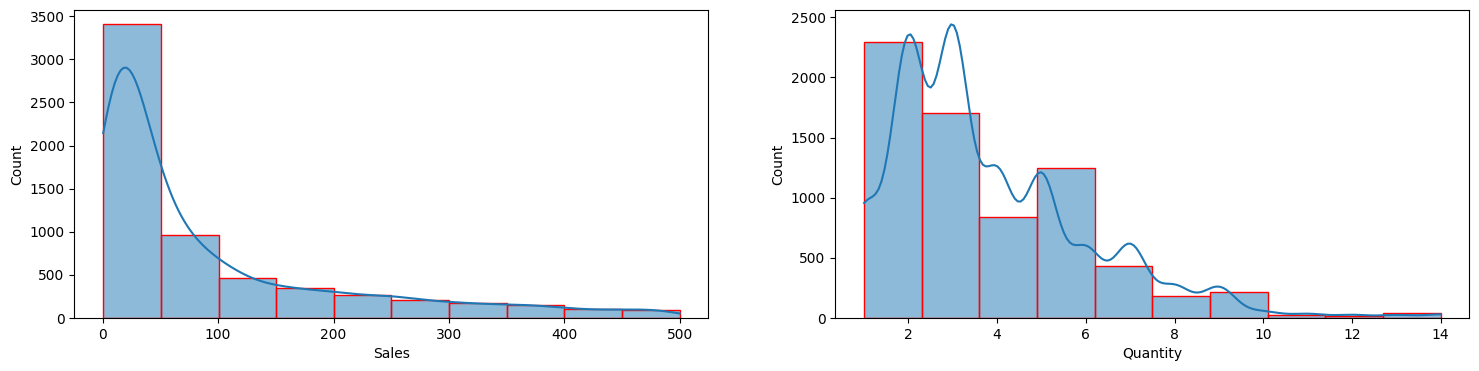

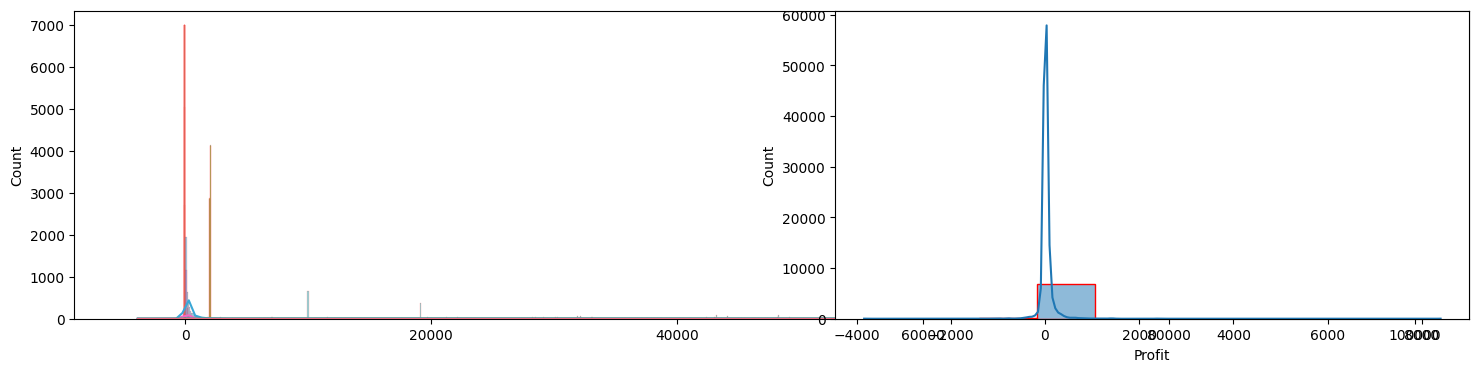

In [155]:
# Outlier Visualization

plt.figure(10, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=raw_train[raw_train['Sales'] <= 500], x='Sales', ax=plt.subplot(121), bins=10, kde=True, edgecolor='red');
sns.histplot(data=raw_train, x='Quantity', ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');

             
plt.figure(11, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=raw_train, kde=True, edgecolor='red');
sns.histplot(data=raw_train, x='Profit', ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');

plt.show()

We see that the data is at bulk on the left and right tail is longer. This is called right skewness.
One way to remove the skewness is by doing the log transformation. But here weare using __boxcox transformation__.
* Box-Cox transformation yielded a better residual structure of the models by reducing the skew.
* The transformation bias is smaller using the Box-Cox transformation, and
* the mean squared error of estimation is smaller with the Box-Cox transformation.

In [157]:
def data_transform(dataFrame):
    posData = dataFrame[dataFrame > 0]
    bcData, lam = stats.boxcox(posData)
    dataFrame[dataFrame > 0] = bcData
    dataFrame[dataFrame <= 0] = -1/lam
    return dataFrame

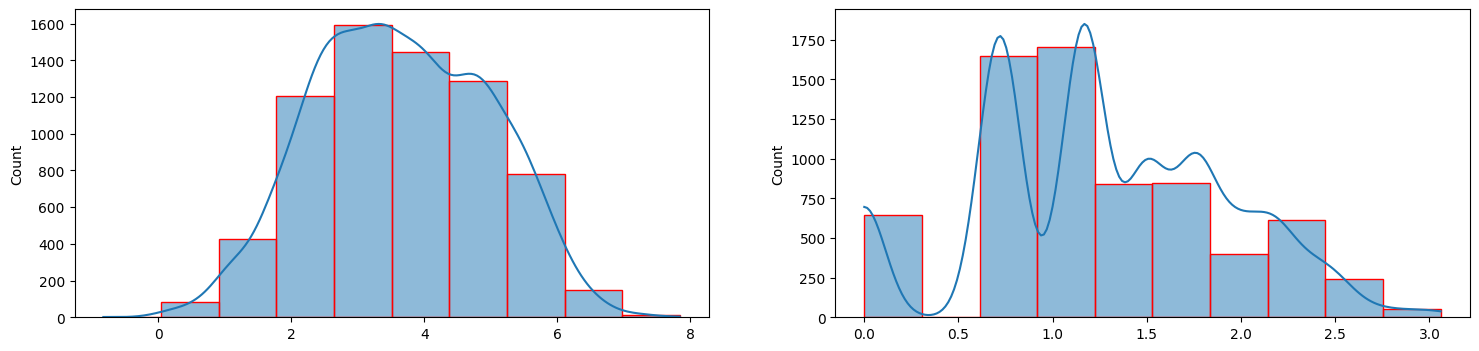

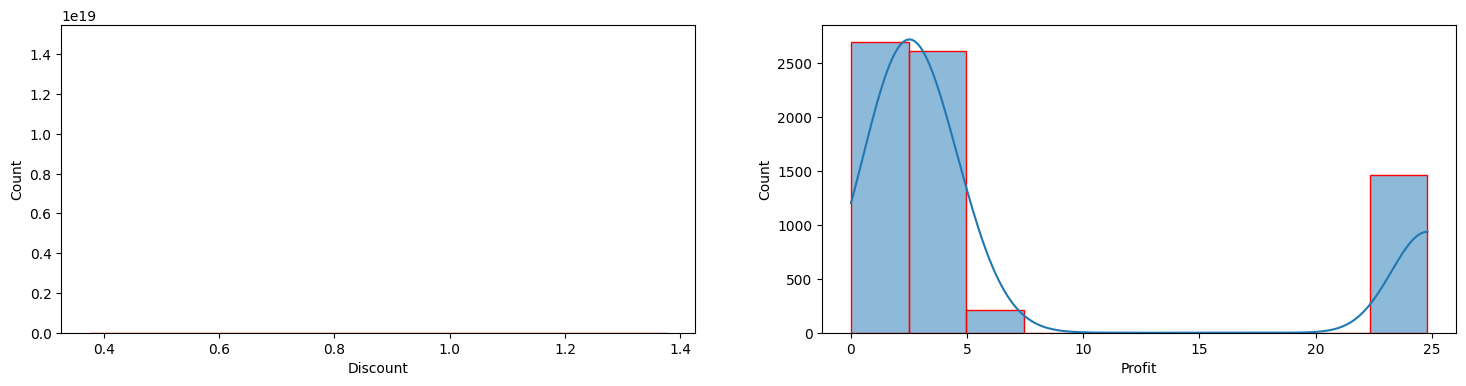

In [158]:
plt.figure(13, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=stats.boxcox(raw_train['Sales'])[0],
ax = plt.subplot(121),bins=10, kde=True, edgecolor='red');


sns.histplot(data=stats.boxcox(raw_train['Quantity'])[0],
ax = plt.subplot(122), bins=10, kde=True, edgecolor='red');


plt.figure(14, figsize=(18, 4))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=data_transform(raw_train['Discount'].copy()),
ax = plt.subplot(121), bins=10, kde=True, edgecolor='red' );
sns.histplot(data=data_transform(raw_train['Profit'].copy()),
ax=plt.subplot(122), bins=10, kde=True, edgecolor='red');

plt.show()

So the data is now in normal distribution
transfer it to raw_train


In [160]:
#adding column for loss and changing 'Profit' accordingly to raw_train

raw_train['Loss'] = raw_train[raw_train['Profit']<0]['Profit'].abs()
raw_train['Loss'].fillna(value=0, inplace=True)
raw_train['Profit'] = np.where(raw_train['Profit'] < 0, 0, raw_train['Profit'])


#adding column for loss and changing 'Profit' accordingly to raw_test

raw_test['Loss'] = raw_test[raw_test['Profit'] < 0]['Profit'].abs()
raw_test['Loss'].fillna(value=0, inplace=True)
raw_test['Profit'] = np.where(raw_test['Profit'] < 0, 0, raw_test['Profit'])

# Performing transformations on train

raw_train['sales_transform'] = stats.boxcox(raw_train['Sales'])[0] # it returns transformed data and lambda value
# by using [0] we only select the transformed data

raw_train['quantity_transform'] = stats.boxcox(raw_train['Quantity'])[0]

raw_train['profit_transform'] = data_transform(raw_train['Profit'].copy())

raw_train['loss_transform'] = data_transform(raw_train['Loss'].copy())

raw_train['discount_transform'] = data_transform(raw_train['Discount'].copy())


#performing transformations on test

raw_test['quantity_transform'] = stats.boxcox(raw_test['Quantity'])[0]

raw_test['profit_transform'] = data_transform(raw_test['Profit'].copy())

raw_test['loss_transform'] = data_transform(raw_test['Loss'].copy())

raw_test['discount_transform'] = data_transform(raw_test['Discount'].copy())

raw_train.head()

,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,ship_year,ship_month,...,Sales,Quantity,Discount,Profit,Loss,sales_transform,quantity_transform,profit_transform,loss_transform,discount_transform
0,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,2016,11,...,261.9600,2,0.00,41.9136,0.000,4.846044,0.720108,3.467992,18.007710,0.876154
1,2016-11-08,2016-11,8,11,2016,2016-11-11,Second Class,11,2016,11,...,731.9400,3,0.00,219.5820,0.000,5.599140,1.167367,4.846120,18.007710,0.876154
2,2016-06-12,2016-06,12,6,2016,2016-06-16,Second Class,16,2016,6,...,14.6200,2,0.00,6.8714,0.000,2.506658,0.720108,1.854410,18.007710,0.876154
3,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,2015,10,...,957.5775,5,0.45,0.0000,383.031,5.789649,1.759841,24.811465,5.065545,0.876154
4,2015-10-11,2015-10,11,10,2015,2015-10-18,Standard Class,18,2015,10,...,22.3680,2,0.20,2.5164,0.000,2.873425,0.720108,0.905878,18.007710,0.876154


In [162]:
raw_test.head()

,Order Date,order_month_year,order_day,order_month,order_year,Ship Date,Ship Mode,ship_day,ship_year,ship_month,...,Category,Sub-Category,Quantity,Discount,Profit,Loss,quantity_transform,profit_transform,loss_transform,discount_transform
6994,2015-11-08,2015-11,8,11,2015,2015-11-13,Second Class,13,2015,11,...,Office Supplies,Art,5,0.0,6.9750,0.000,1.711211,1.865090,13.384020,0.947894
6995,2015-11-19,2015-11,19,11,2015,2015-11-26,Standard Class,26,2015,11,...,Office Supplies,Appliances,4,0.0,8.3916,0.000,1.461372,2.034820,13.384020,0.947894
6996,2017-12-23,2017-12,23,12,2017,2017-12-25,Second Class,25,2017,12,...,Office Supplies,Binders,4,0.8,0.0000,22.144,1.461372,23.769219,2.765244,0.947894
6997,2017-12-23,2017-12,23,12,2017,2017-12-25,Second Class,25,2017,12,...,Office Supplies,Paper,4,0.2,63.7536,0.000,1.461372,3.812130,13.384020,0.947894
6998,2016-09-16,2016-09,16,9,2016,2016-09-22,Standard Class,22,2016,9,...,Office Supplies,Paper,2,0.0,6.3504,0.000,0.711588,1.778466,13.384020,0.947894


In [163]:
print('Shape of raw_train:', raw_train.shape)
print('Shape of raw_test:', raw_test.shape)

Shape of raw_train: (6992, 29)
Shape of raw_test: (3000, 27)


# Evaluation Metrics

__Accuracy is a measure for classification, not regression. The skill or performane of a regression model must be reported as an error in those predictions.__
This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, __we want to know how close the predictions were to the expected values.__

__Error addresses exactly this and summarizes on average how close predictions were to their expected values.__

There are many error metrics that are used for evaluation and reporting the performance of a regression model; they are:

* Mean Absolute Error(MAE)
* Mean Squared Error(MSE)
* Root Mean Square Error(RMSE)
* Root Mean Squared Log Error(RMSLE)
* R Squared(R2)


# 📊 Regression Evaluation Metrics

---

## 📏 Mean Absolute Error (MAE)

**Formula:**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

**Explanation:**

MAE calculates the average absolute difference between the actual and predicted values.

Example: After fitting a linear regression model, you compute how far each prediction is from the actual value (in absolute terms), and then take the mean. This gives the Mean Absolute Error.

**Goal:** Minimize the MAE — smaller is better.

**Advantages:**
- Output is in the **same unit** as the target variable.
- **Robust to outliers**.

**Disadvantages:**
- **Not differentiable**, so it’s harder to optimize using gradient-based methods.

---

## 📏 Mean Squared Error (MSE)

**Formula:**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

**Explanation:**

MSE squares the errors instead of taking absolute values. This penalizes **larger errors more heavily** than smaller ones.

**Advantages:**
- **Differentiable**, so good for gradient-based optimizers.
- Encourages models that avoid large errors.

**Disadvantages:**
- Output is in **squared units**.
- **Very sensitive** to outliers.

---

## 📏 Root Mean Squared Error (RMSE)

**Formula:**

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$

Or simply:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Explanation:**

RMSE is the square root of MSE — it brings the error back to the same unit as the target variable.

**Advantages:**
- **Same unit** as the output, so it’s easier to interpret.

**Disadvantages:**
- **Not robust to outliers**.

---

## 📏 Root Mean Squared Log Error (RMSLE)

**Formula:**

$$
\text{RMSLE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2 }
$$

**Explanation:**

This metric applies the RMSE logic to **log-transformed values**. Useful when targets span several orders of magnitude and we care more about **relative differences**.

**Advantages:**
- Handles **large ranges** of output values well.
- Common in ML competitions.

**Disadvantages:**
- Can only be used when all predictions and targets are **≥ 0**.

---

## 📏 R-squared Score (R²)

**Formula:**

$$
R^2 = 1 - \frac{ \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }{ \sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2 }
$$

Where:
- $$y_i $$ is the actual value
- $$\hat{y}_i$$ is the predicted value
- $$\bar{y}$$ is the mean of actual values

**Explanation:**

R² tells us how well the model explains the **variance** in the data.

* $$R^2 = 1:$$ perfect fit
* $$R^2 = 0$$: model is no better than predicting the mean
- $$R^2 < 0 $$: model is worse than predicting the mean

**Advantages:**
- **Context-independent**: good for comparing different models.

**Disadvantages:**
- Can be **misleading alone** — should be used with MAE/RMSE.

---
__R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.__

__In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context. So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.__

__Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.Now, how will you interpret the R2 score? Suppose if the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.__

__Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible. So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves. The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.__

# Model Building


Most of the machine learning algorithms can not handle categorical variables unless we convert them to numerical values, because machine learning algorihtms are nothing but a mathematical equation and it requires numbers to work on not some string values. __Many algorithm’s performances vary based on how categorical features are encoded.__ There are vaious encoding techniques:

- Label Encoding.
- One Hot Encoding.
- Ordinal Encoding.
- Mean Encoding or Target Encoding.

In [171]:
from sklearn.preprocessing import LabelEncoder

X =  raw_train.drop(['Order Date', 'order_month_year','Ship Date', 'ship_month_year','Sales','sales_transform'], axis=1)

for col in X.columns:
    if X[col].dtype == 'object':
        lb = LabelEncoder()
        X[col + '_encoded'] = lb.fit_transform(X[col].values)
        X.drop(columns=col, inplace=True)



In [172]:
y= raw_train['Sales']


In [173]:
X.shape, y.shape

((6992, 23), (6992,))

In [174]:
y.head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

In [175]:
X.dtypes

order_day                 int32
order_month               int32
order_year                int32
ship_day                  int32
ship_year                 int32
ship_month                int32
Postal Code               int64
Quantity                  int64
Discount                float64
Profit                  float64
Loss                    float64
quantity_transform      float64
profit_transform        float64
loss_transform          float64
discount_transform      float64
Ship Mode_encoded         int32
Segment_encoded           int32
Country_encoded           int32
City_encoded              int32
State_encoded             int32
Region_encoded            int32
Category_encoded          int32
Sub-Category_encoded      int32
dtype: object

In [176]:
import prettytable
import xgboost

In [221]:
models_results_rmse = {}
models_results_r2 = {}

def evaluate(y_t, y_p, title):
    table = PrettyTable()
    table.field_names = ['Metric', 'Value']

    rmse = mean_squared_error(y_t, y_p, squared=False).round(4)
    r2 = (r2_score(y_t, y_p))

    table.add_row(['RMSE',rmse])
    table.add_row(['R2 Score', r2])

    models_results_rmse[title] =  rmse
    models_results_r2[title] = r2

    print(table)


In [200]:
raw_train['order_year'].unique()

array([2016, 2015, 2014, 2017])

In [210]:
def plot_forecasted_sales(y_pred, y_train, y_true=[], period=5, title=''):

    #plot
    plt.figure(figsize=(20, 8))
    plt.plot(y_train.to_list(),color=colors[0])
    plt.plot([None for i in y_train] + [x for x in y_pred], color=colors[2])

    # set legend
    if len(y_true) > 0:
        plt.plot([None for i in y_train] + [x for x in y_true], color=colors[1])
        plt.legend(['2014-2016 Actual SALES', '2017 Actual SALES',
        f'2017 Forecasted SALES \(RMSE = {mean_squared_error(y_true, y_pred, squared=False).round(1)},R2 = {r2_score(y_true, y_pred).round(3)})'])
    else:
        plt.legend(['2014-2017 Actual SALES', '2018-2020 Forecasted SALES'])

    # set parameters
    plt.xticks(range(0, len(y_train) + len(y_pred), period), rotation=75)
    plt.xlabel('Week')
    plt.ylabel('Sales')
    plt.title(title)
    plt.show()

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)

evaluate(y_test, y_pred, title='Linear Regression')


+----------+--------------------+
|  Metric  |       Value        |
+----------+--------------------+
|   RMSE   |      334.8461      |
| R2 Score | 0.6988240860143555 |
+----------+--------------------+


In [225]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(max_depth=3)
modelDTR.fit(X_train, y_train)
y_pred = modelDTR.predict(X_test)

evaluate(y_test, y_pred, title='Decision Tree Regression')

+----------+--------------------+
|  Metric  |       Value        |
+----------+--------------------+
|   RMSE   |      377.8183      |
| R2 Score | 0.6165615573448082 |
+----------+--------------------+


In [228]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(max_depth=10)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)

evaluate(y_test, y_pred, title='Random Forest Regression')

+----------+--------------------+
|  Metric  |       Value        |
+----------+--------------------+
|   RMSE   |      286.2171      |
| R2 Score | 0.7799502872531341 |
+----------+--------------------+


In [231]:
from sklearn.svm import SVR

modelSVR = SVR()
modelSVR.fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)

evaluate(y_test, y_pred, title='Support Vector Regression')

+----------+----------------------+
|  Metric  |        Value         |
+----------+----------------------+
|   RMSE   |       630.1963       |
| R2 Score | -0.06679614948073054 |
+----------+----------------------+


In [238]:
from xgboost import XGBRegressor

modelXGB = XGBRegressor()
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_test)

evaluate(y_test, y_pred, title='XGBoost')

+----------+--------------------+
|  Metric  |       Value        |
+----------+--------------------+
|   RMSE   |      345.8608      |
| R2 Score | 0.6786840010319968 |
+----------+--------------------+


__So the best model is Random Forest__

__Model Evaluation - R2 Score__

<Figure size 2000x800 with 0 Axes>

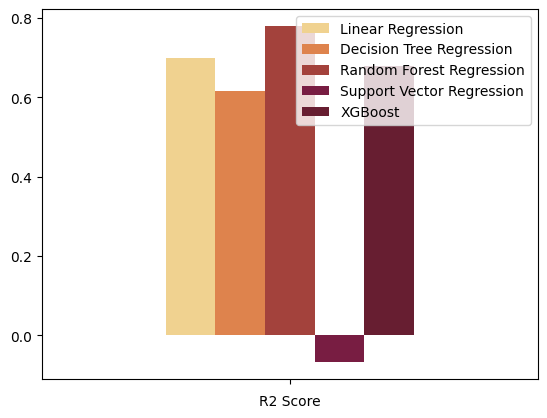

In [242]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_r2, index=['']).plot.bar(color=colors2);
plt.xlabel('R2 Score');
plt.show()

__Model Evaluation - Root Mean Square Error__

<Figure size 2000x800 with 0 Axes>

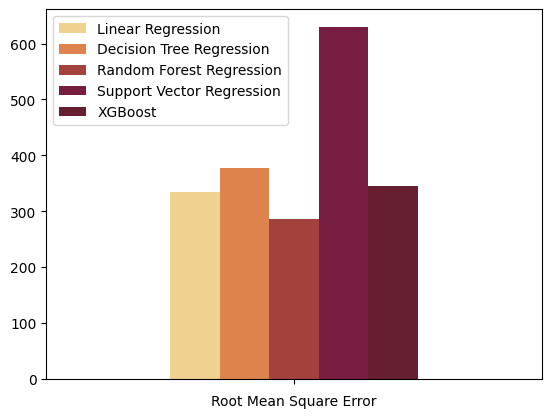

In [248]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_rmse, index=['']).plot.bar(color=colors2);
plt.xlabel('Root Mean Square Error');
plt.show()

# final forecasting using best performance model( random forest regression)

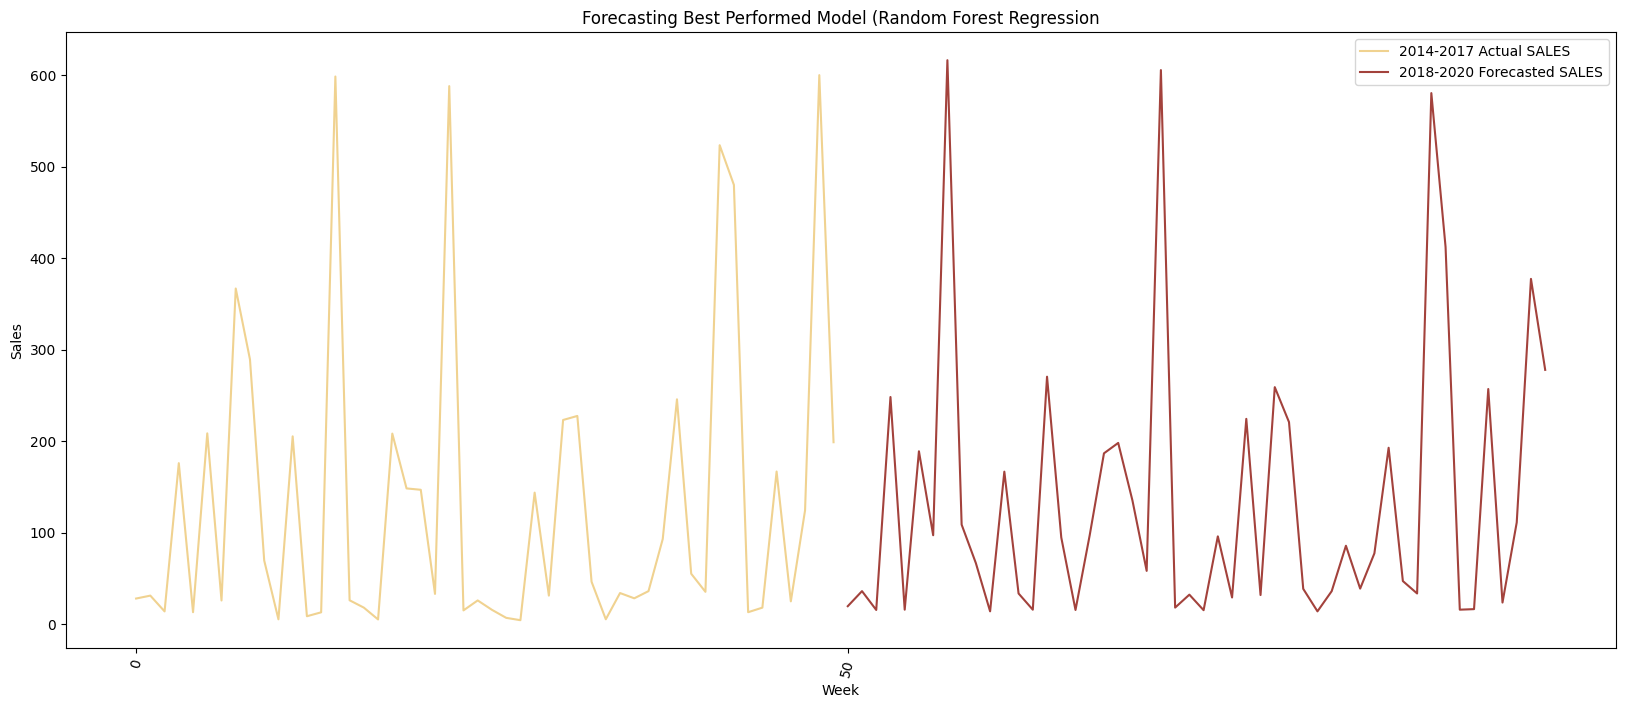

In [258]:
X = raw_test.drop(['Order Date', 'order_month_year', 'Ship Date', 'ship_month_year'], axis=1)
for col in X.columns:
    if X[col].dtype == 'object':
        lb = LabelEncoder()
        X[col + '_encoded'] = lb.fit_transform(X[col].values)
        X.drop(columns=col, inplace=True)

days =50
y_pred = modelRFR.predict(X)[:days]
y_test = df.iloc[6994:, -4][:days]
plot_forecasted_sales(y_train=y_test, y_pred=y_pred, period=days, 
title = 'Forecasting Best Performed Model (Random Forest Regression')